In [280]:
import numpy as np
# import numexpr as npexp
import matplotlib.pyplot as plt
# from matplotlib.image import imread
from cv2 import imread

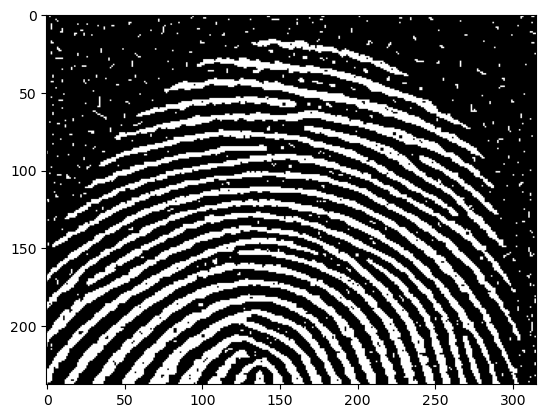

In [301]:
fingerprint = imread('Fig0911(a)(noisy_fingerprint).tif')
fingerprint = fingerprint[:,:,0]
original_image = fingerprint
plt.imshow(original_image,cmap='gray')
plt.show()

###### Creating structing element (3x3)

In [282]:
m = n = 3
struct_ele = np.ones((m,n))
struct_ele

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

###### Operation of Noise removal is :-
* opeining -> closing is noise removal

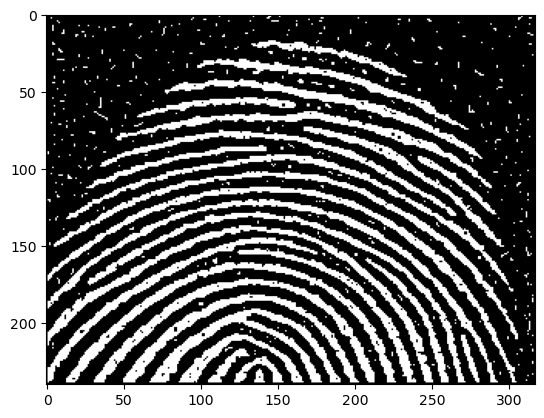

In [284]:
fingerprint = np.pad(fingerprint,pad_width=((m//2),(n//2)))
fingerprint.shape
plt.imshow(fingerprint,cmap='gray')
plt.show()

Function to extract slices of data from image

In [285]:
def parts(image,struct_ele,i,j):
    m,n = struct_ele.shape
    return image[i:m+i,j:j+n]

In [286]:
def erosion(padded_image,struct_ele):
    m,n = struct_ele.shape
    for i in range(m//2,padded_image.shape[0]-m+1):
        for j in range(n//2,padded_image.shape[1]-n+1):
            padded_image[i][j] = np.min(np.multiply(parts(padded_image,struct_ele,i,j),(struct_ele)))
    #          sliced = parts(pcb_image,struct_ele,i,j)
    #          if sliced.shape == struct_ele.shape:
    #             continue
    #          else:
    #              print(i,j)
    return padded_image[:-m,:-n]

In [287]:
def dilation(padded_image,struct_ele):
    m,n = struct_ele.shape
    for i in range(m//2,padded_image.shape[0]-m+1):
        for j in range(n//2,padded_image.shape[1]-n+1):
            padded_image[i][j] = np.max(np.multiply(parts(padded_image,struct_ele,i,j),(struct_ele)))
    #          sliced = parts(pcb_image,struct_ele,i,j)
    #          if sliced.shape == struct_ele.shape:
    #             continue
    #          else:
    #              print(i,j)
    return padded_image[:-m,:-n]

In [288]:
# m,n = struct_ele.shape
# for i in range(m//2,image.shape[0]-m+1):
#     for j in range(n//2,image.shape[1]-n+1):
#         padded_image[i][j] = np.min(np.multiply(parts(padded_image,struct_ele,i,j),(struct_ele)))
# #          sliced = parts(pcb_image,struct_ele,i,j)
# #          if sliced.shape == struct_ele.shape:
# #             continue
# #          else:
# #              print(i,j)

In [289]:
def opening_operation(padded_image,struct_ele):
    padded_image = erosion(padded_image,struct_ele)    
    padded_image = dilation(padded_image,struct_ele)
    return padded_image

In [290]:
def closing_operation(padded_image,struct_ele):
    padded_image = dilation(padded_image,struct_ele)
    padded_image = erosion(padded_image,struct_ele)    
    return padded_image

###### Noise removal Function to operate on any image

In [291]:
def noise_removal(padded_image,struct_ele):
    padded_image = opening_operation(padded_image,struct_ele)
    padded_image = closing_operation(padded_image,struct_ele)
    return padded_image

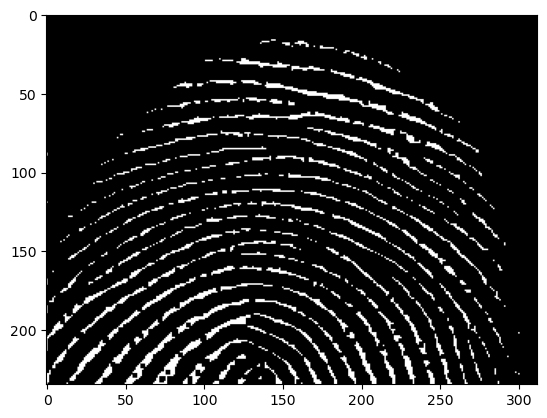

In [292]:
fingerprint = original_image
eroded_fingerprint = erosion(fingerprint,struct_ele)
plt.imshow(eroded_fingerprint,cmap='gray')
plt.show()

As we notice, erosion removes the gaps from the image and the surrouding noise but the image outline is still too thin

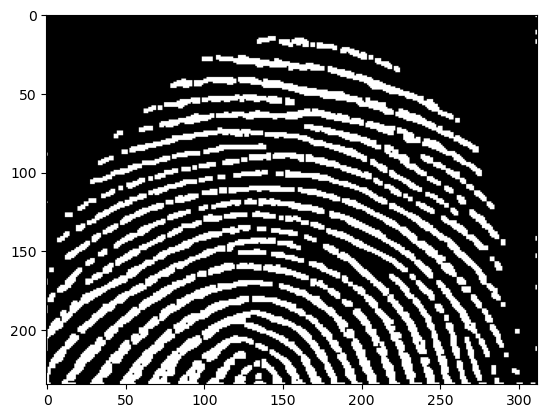

In [293]:
fingerprint = original_image
dilated_fingerprint = dilation(fingerprint,struct_ele)
plt.imshow(dilated_fingerprint,cmap='gray')
plt.show()

Dilation here increases the size of these lines but repeating the operation in reverse order results tin complete noise removal

In [294]:
fingerprint = original_image

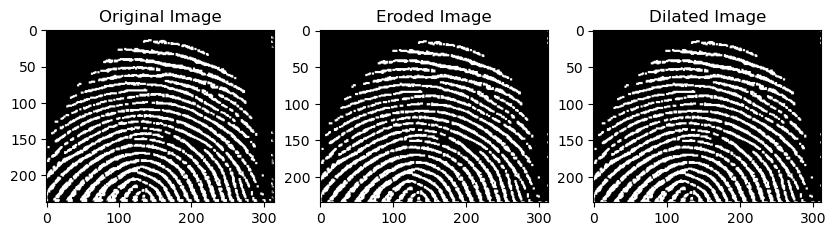

In [295]:
fig, ax = plt.subplots(figsize=(10,6),nrows=1,ncols=3)
ax[0].imshow(original_image,cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(eroded_fingerprint, cmap='gray')
ax[1].set_title('Eroded Image')
ax[2].imshow(dilated_fingerprint,cmap='gray')
ax[2].set_title('Dilated Image')
plt.show()

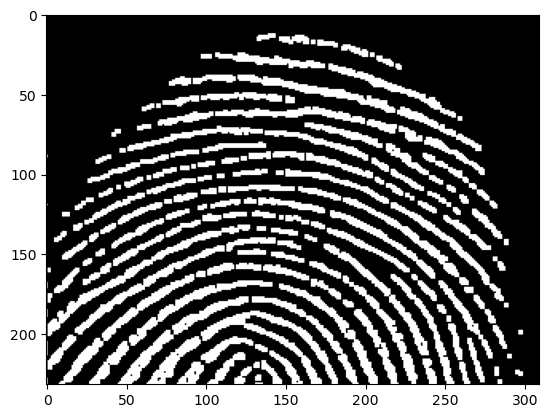

In [296]:
# fingerprint = original_image
opened_fingerprint = opening_operation(fingerprint,struct_ele)
plt.imshow(opened_fingerprint,cmap='gray')
plt.show()

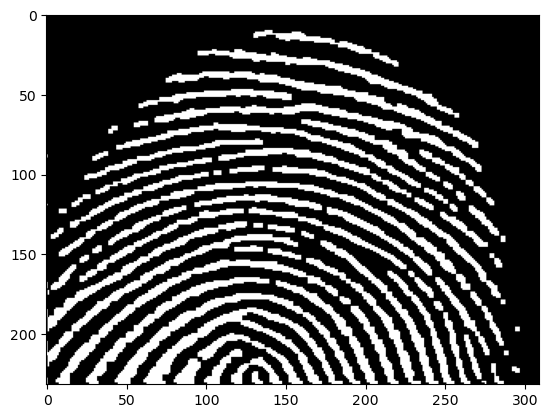

In [297]:
fingerprint = original_image
closed_fingerprint = closing_operation(fingerprint,struct_ele)
plt.imshow(closed_fingerprint,cmap='gray')
plt.show()

In [298]:
# fig, ax = plt.subplots(nrows=2,ncols=2)
# ax[0,0].imshow(original_image,cmap='gray')
# ax[0,0].set_title('Original Image')
# ax[0,1].imshow(opened_fingerprint, cmap='gray')
# ax[0,1].set_title('Opening Operation on Image')
# ax[1,0].imshow(closed_fingerprint,cmap='gray')
# ax[1,0].set_title('Closing Operation on Image')
# ax[1,1].imshow(fingerprint,cmap='gray')
# ax[1,1].set_title('Final Image (Noise Removal)')
# plt.show()

In [299]:
fingerprint = original_image
final_image = noise_removal(fingerprint,struct_ele)

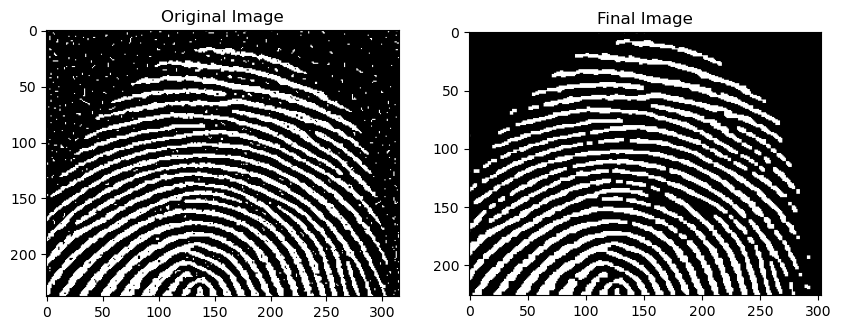

In [302]:
fig, ax = plt.subplots(figsize=(10,6),nrows=1,ncols=2)
ax[0].imshow(original_image,cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(final_image, cmap='gray')
ax[1].set_title('Final Image')
plt.show()

We can see that noise in image has been reduced on performing opening then closing operation in succession on the same image. Also, it can be noted that if we increase the size of the structuring element causes the image to break as the erosion in the openeing operation leaves it with very large holes.